# Storytelling with Data

## Contents

- [Imports](#section1)
- [Preprocessing with Pandas](#section2)
    - [Handling missing data](#subsection2.1)
    - [Row indexes of data frames](#subsection2.2)
    - [Operations on series](#subsection2.3)
- [Guidelines of Data Visualization](#section3)
    - [Line graph](#subsection3.1)
    - [Bar chart](#subsection3.2)
    - [Scatterplots](#subsection3.3)
    - [What to avoid](#subsection3.4)
    - [Interpretation of data visuals](#subsection3.5)

## Imports <a id="section1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Preprocessing with Pandas <a id="section2"></a>

### Handling missing data <a id="subsection2.1"></a>

It is pretty common that real-world datasets may have some amount of data missing, such as the GDP data of all countries and entities from 1960 to 2020. It is observed that many values are missing, especially in the early years, probably because the data were not collected or not applicable. 

Suppose that we are interested in the GDP values of the first six countries from 1980 to 1983, the subset of data are created by the following code segment.

In [2]:
gdp = pd.read_csv('gdp.csv')
gdp

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN
1,Africa Eastern and Southern,AFE,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,3.223912e+10,3.351455e+10,...,9.730435e+11,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,...,7.275704e+11,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+11,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,9.007159e+09
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540134e+10,4.041524e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,2.188761e+10,1.884051e+10,2.106169e+10
263,South Africa,ZAF,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,...,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11,4.199464e+11
264,Zambia,ZMB,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,1.264286e+09,1.368000e+09,...,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.120306e+10


In [3]:
cols = ['Country Name', '1980', '1981', '1982', '1983']
gdp_subset = gdp.loc[:5, cols]
gdp_subset

,Country Name,1980,1981,1982,1983
0,Aruba,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
2,Afghanistan,3.641723e+09,3.478788e+09,NaN,NaN
3,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
4,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09
5,Albania,NaN,NaN,NaN,NaN


It can be seen that some GDP values are missing. The missing values are indicated by the mark `NaN`, meaning "not a number". Next, we will discuss basic Pandas operations related to missing data.

#### Detecting missing data: `isnull()` and `notnull()`

The `isnull()` method is associated with `pandas.DataFrame` and `pandas.Series` objects. It returns `True` if the item in the data frame or series is missing, and `False` otherwise. The other method, `notnull()`, as you can tell from the name, returns `True` if the item is not missing, and `False` otherwise. 

In [4]:
gdp_subset.isnull()

,Country Name,1980,1981,1982,1983
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,True,True
3,False,False,False,False,False
4,False,False,False,False,False
5,False,True,True,True,True


In [5]:
gdp_subset.notnull()

,Country Name,1980,1981,1982,1983
0,True,False,False,False,False
1,True,True,True,True,True
2,True,True,True,False,False
3,True,True,True,True,True
4,True,True,True,True,True
5,True,False,False,False,False


The boolean values returned by the `isnull()` or `notnull()` method can be used to remove missing values from the data set. For example. For a selected year, we can retrieve all GDP values that are not `NaN` by the following code segment.

In [6]:
year = '1981'

bool_series = gdp_subset[year].notnull()
gdp_subset.loc[bool_series, ['Country Name', year]]

,Country Name,1981
1,Africa Eastern and Southern,1.743870e+11
2,Afghanistan,3.478788e+09
3,Africa Western and Central,2.110035e+11
4,Angola,5.550483e+09


#### Dropping missing values: `dropna()`

A more convenient way of selecting items that are not `NaN` is to use the `dropna()` method, which also applies to both `pandas.DataFrame` and `pandas.Series` objects. The same GDP data subset could be used to demonstrate how it works.

In [7]:
gdp_subset.dropna()

,Country Name,1980,1981,1982,1983
1,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
3,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
4,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09


By default, the `dropna()` method drops all rows with any missing values. As you can see from the following example, rows `0`, `1` and `3` that have `NaN` values in any columns are removed, so there are only three rows left after dropping the missing records. 

Please note that in the default setting, the `dropna()` method returns a new `pandas.DataFrame` object where rows with `NaN` values removed, while the original data table remain unchanged.

In [8]:
output = gdp_subset.dropna()
output

,Country Name,1980,1981,1982,1983
1,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
3,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
4,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09


In [9]:
gdp_subset

,Country Name,1980,1981,1982,1983
0,Aruba,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
2,Afghanistan,3.641723e+09,3.478788e+09,NaN,NaN
3,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
4,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09
5,Albania,NaN,NaN,NaN,NaN


Besides creating a new data frame object with missing values to be removed, we can also drop `NaN` values from the original data frame by specifying the argument `inplace=True`. In such cases, the original data frame is overwritten, but the `dropna()` method returns nothing (`None`), as shown by the code segments below.

In [10]:
output = gdp_subset.dropna(inplace=True)
print(output)

None


In [11]:
gdp_subset

,Country Name,1980,1981,1982,1983
1,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
3,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
4,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09


You may use the `help()` function to explore other arguments of the `dropna()` method, such as `axis` and `how`.

#### Replacing `NaN` by other values: `fillna()`

Sometimes rather than dropping `NaN` values, we would rather replace them with a valid value, such as zero or a string remark. Take the following data subset, for example.

In [12]:
cols = ['Country Name', '1980', '1981', '1982', '1983']
gdp_subset = gdp.loc[:5, cols]
gdp_subset

,Country Name,1980,1981,1982,1983
0,Aruba,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
2,Afghanistan,3.641723e+09,3.478788e+09,NaN,NaN
3,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
4,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09
5,Albania,NaN,NaN,NaN,NaN


The `NaN` records in the data frame can be replaced by an given value, such as zero, by calling the the `fillna()` method.

In [13]:
output = gdp_subset.fillna(0)
output

,Country Name,1980,1981,1982,1983
0,Aruba,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
2,Afghanistan,3.641723e+09,3.478788e+09,0.000000e+00,0.000000e+00
3,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
4,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09
5,Albania,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [14]:
gdp_subset

,Country Name,1980,1981,1982,1983
0,Aruba,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
2,Afghanistan,3.641723e+09,3.478788e+09,NaN,NaN
3,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
4,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09
5,Albania,NaN,NaN,NaN,NaN


Similar to the `dropna()` method, the `fillna()` method creates a new data frame object with the all `NaN` items replaced by the given value. We can also use the method to overwrite the original data frame, as the argument `inplace` is specify to be `True`. In such cases, the `fillan()` method returns no result, as shown below.

In [15]:
output = gdp_subset.fillna(0, inplace=True)
print(output)

None


In [16]:
gdp_subset

,Country Name,1980,1981,1982,1983
0,Aruba,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
2,Afghanistan,3.641723e+09,3.478788e+09,0.000000e+00,0.000000e+00
3,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
4,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09
5,Albania,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


It can be seen that the `inplace` argument plays an important role in determining if a method
- Returns a new data frame (or series) object with the intended changes; or 
- Returns no output (`None`), but directly changes the given data frame (or series) object. 

There will be other similar cases using the `inplace` argument discussed in the subsequent sections. 

### Row indexes of data frames

Recalling that rows of a data frame are labeled by indexes, and we could access a specific row or a collection of rows using the row indexes. In Jupyter Notebook, such row indexes, together with column indexes, are highlighted by bold letters, see the example below.

In [17]:
cols = ['Country Name', '1980', '1981', '1982', '1983']
gdp_subset = gdp.loc[:5, cols]
gdp_subset

,Country Name,1980,1981,1982,1983
0,Aruba,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
2,Afghanistan,3.641723e+09,3.478788e+09,NaN,NaN
3,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
4,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09
5,Albania,NaN,NaN,NaN,NaN


In this section, we will focus on operations related to the label based row indexes.

#### Specifying row indexes: `set_index()`

<div class="alert alert-block alert-success">
<b>Example 1:</b> 
    Visualize the GDP trend of three countries: China, Japan, and Germany, from 1980 to 2015.
</div>

Here, we need to select relevant data for the visualization. In the previous lecture, we learned that the selection can be done by boolean indexing, i.e., selecting rows where the `Country Name` or `Country Code` variable is the same as the given value. 

In [18]:
gdp_chn = gdp.loc[gdp['Country Code'] == 'CHN', '1980':'2015']
gdp_jpn = gdp.loc[gdp['Country Code'] == 'JPN', '1980':'2015']
gdp_deu = gdp.loc[gdp['Country Code'] == 'DEU', '1980':'2015']

It can be seen that in this case, selecting data using boolean indexing is inconvenient and not straightforward. An alternative approach is to select records based on their row indexes. For example, GDP data of China, Japan, and Germany can be accessed via index 35, 97, and 49, respectively. However, the integer indexes are not straightforward either. 

A better solution is to convert the country names or country codes into row indexes, so that we could access each country via such readable row indexes. Such row indexes can be created using the `set_index()` method, as shown by the code below.

In [19]:
gdp_new = gdp.set_index('Country Code')
gdp_new

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN
AFE,Africa Eastern and Southern,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,3.223912e+10,3.351455e+10,3.652148e+10,...,9.730435e+11,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12
AFG,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
AFW,Africa Western and Central,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,...,7.275704e+11,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11
AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+11,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,9.007159e+09
YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540134e+10,4.041524e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,2.188761e+10,1.884051e+10,2.106169e+10
ZAF,South Africa,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,1.712479e+10,...,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11,4.199464e+11


It can be seen that the `set_index()` method converts the given column `Country Code` into the row indexes, while the default indexes are discarded. With the new row indexes, we can access the GDP data for a specific country via the country code, which is more straightforward and readable. 

In [20]:
gdp_chn = gdp_new.loc['CHN', '1980':'2015']
gdp_jpn = gdp_new.loc['JPN', '1980':'2015']
gdp_deu = gdp_new.loc['DEU', '1980':'2015']

Then the trend of GDP data can be easily visualized. 

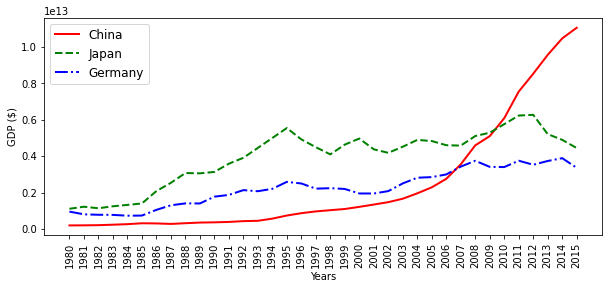

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(gdp_chn.index, gdp_chn, linewidth=2, linestyle='-', color='r', label='China')
plt.plot(gdp_jpn.index, gdp_jpn, linewidth=2, linestyle='--', color='g', label='Japan')
plt.plot(gdp_deu.index, gdp_deu, linewidth=2, linestyle='-.', color='b', label='Germany')
plt.legend(fontsize=12)
plt.xlabel('Years', fontsize=10)
plt.ylabel('GDP ($)', fontsize=10)
plt.xticks(rotation=90)
plt.show()

In the example above, we demonstrated how to use the `set_index()` method to turn a column of a data frame into its row indexes. Similarly, the row indexes can be converted into a column of the data frame. Such a conversion is conducted using the `reset_index()`. Take the data frame `gdp_new`, for example. whose row indexes are specified to be the three-letter country code. 

In [22]:
gdp_new

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN
AFE,Africa Eastern and Southern,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,3.223912e+10,3.351455e+10,3.652148e+10,...,9.730435e+11,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12
AFG,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
AFW,Africa Western and Central,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,...,7.275704e+11,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11
AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+11,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,9.007159e+09
YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540134e+10,4.041524e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,2.188761e+10,1.884051e+10,2.106169e+10
ZAF,South Africa,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,1.712479e+10,...,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11,4.199464e+11


The row indexes can be converted into a new column, while the default integer row indexes are recovered, by the `rest_index()` method. 

In [23]:
gdp_new.reset_index()

,Country Code,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN
1,AFE,Africa Eastern and Southern,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,3.223912e+10,3.351455e+10,...,9.730435e+11,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12
2,AFG,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,AFW,Africa Western and Central,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,...,7.275704e+11,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11
4,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+11,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,9.007159e+09
262,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540134e+10,4.041524e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,2.188761e+10,1.884051e+10,2.106169e+10
263,ZAF,South Africa,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,...,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11,4.199464e+11
264,ZMB,Zambia,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,1.264286e+09,1.368000e+09,...,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.120306e+10


An important application of the `reset_index()` method is for recovering the default integer row indexes after performing boolean filtering or dropping missing values. Check the code segments below. 

In [24]:
cols = ['Country Name', '1980', '1981', '1982', '1983']
gdp_subset = gdp.loc[:5, cols]
gdp_subset

,Country Name,1980,1981,1982,1983
0,Aruba,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
2,Afghanistan,3.641723e+09,3.478788e+09,NaN,NaN
3,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
4,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09
5,Albania,NaN,NaN,NaN,NaN


In [25]:
output = gdp_subset.dropna()
output

,Country Name,1980,1981,1982,1983
1,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
3,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
4,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09


Note that the row indexes now turn into irregular numbers, as a few rows with missing records are removed by the `dropna` method. The `reset_index()` method can be then used to recover the default row indexes.

In [26]:
output.reset_index()

,index,Country Name,1980,1981,1982,1983
0,1,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
1,3,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
2,4,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09


Note that in the data frame above, the previous row indexes are converted into a new column named `index`. In cases of filtering or dropping missing records, the extra column is useless and can be dropped by specifying the keyword argument `drop` to be `True`.

In [27]:
output.reset_index(drop=True)

,Country Name,1980,1981,1982,1983
0,Africa Eastern and Southern,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11
1,Africa Western and Central,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11
2,Angola,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09


Then the default row indexes are recovered and the previous indexes are discarded. 

Notice that the `set_index()` and `reset_index()` methods are similar to the `dropna()` and `fillna()` methods, which create new data frames under the default setting. By specifying the same `inplace` argument to be `True`, we can directly change the row indexes of the original data frame, with no output to be returned. 

### Operations on series <a id="subsection2.3"></a>

#### Element-wise arithmetic operations
Pandas is able to perform quick element-wise operations (addition, subtraction, multiplication, etc.) on series without using loops. As shown by the following examples, the results of expressions involving series are also series, with such mathematical operations being applied to element of the series. 

In [28]:
# GDP of 1980 in million dollars

gdp_new['1980'] / 1000000

Country Code
ABW              NaN
AFE    170654.335897
AFG      3641.723322
AFW    112031.308654
AGO      5930.503401
           ...      
XKX              NaN
YEM              NaN
ZAF     89411.894561
ZMB      3829.500000
ZWE      6678.868200
Name: 1980, Length: 266, dtype: float64

In [29]:
# GDP increase of 1981 compared with 1980, in million dollars

(gdp_new['1981'] - gdp_new['1980']) / 1000000

Country Code
ABW             NaN
AFE     3732.672071
AFG     -162.935413
AFW    98972.183346
AGO     -380.020365
           ...     
XKX             NaN
YEM             NaN
ZAF     3729.583674
ZMB       43.166667
ZWE     1332.505600
Length: 266, dtype: float64

In [30]:
# Increase rate of GDP in 1981 compared with 1980, in percentage

(gdp_new['1981'] - gdp_new['1980']) / gdp_new['1980'] * 100

Country Code
ABW          NaN
AFE     2.187271
AFG    -4.474129
AFW    88.343325
AGO    -6.407894
         ...    
XKX          NaN
YEM          NaN
ZAF     4.171239
ZMB     1.127214
ZWE    19.951069
Length: 266, dtype: float64

#### Vectorized string operations

When dealing with text data, we may want to conduct the same operation, e.g., indexing, slicing, case conversion, on all strings in a series. A straightforward solution is to use a `for` loop to iterate and process each string record. A better solution is to apply the **vectorized string operations**, where all string records are processed simultaneously with a single function/method call.

Pandas enables vectorized operations of string via the <code>str</code> attribute, as demonstrated by the following example.

Consider the first column `project`, which is a series of condo project names in upper cases, we could use the vectorized version of the string method `lower()` to convert all names to lower case letters. 

In [31]:
prop = pd.read_csv('properties2.csv')
prop

,project,street,type,district,segment,tenure,commence,sale,price,area,level,date
0,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,99 years,2019.0,New Sale,2567000,1496,11 to 15,Dec-21
1,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,2986000,1281,16 to 20,Dec-21
2,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,1835000,700,21 to 25,Dec-21
3,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,1924000,840,06 to 10,Dec-21
4,THE CREST,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 years,2012.0,Resale,1620000,883,11 to 15,Dec-21
...,...,...,...,...,...,...,...,...,...,...,...,...
104896,FLORAVILLE,CACTUS ROAD,Apartment,28,OCR,freehold,NaN,New Sale,910000,818,01 to 05,Jan-17
104897,EUPHONY GARDENS,JALAN MATA AYER,Condominium,27,OCR,99 years,1998.0,Resale,739998,1044,01 to 05,Jan-17
104898,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 years,2014.0,New Sale,875000,797,11 to 15,Jan-17
104899,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 years,2014.0,New Sale,759000,689,11 to 15,Jan-17


In [32]:
project = prop['project']
project_lower = project.str.lower()
print(project_lower)

0                  parc clematis
1                 one pearl bank
2                 one pearl bank
3                 one pearl bank
4                      the crest
                   ...          
104896                floraville
104897           euphony gardens
104898           symphony suites
104899           symphony suites
104900    seletar park residence
Name: project, Length: 104901, dtype: object


Other string methods, like `replace()`, `count()`, could be vectorized and applied to each string record in the same manner.

In [33]:
project.str.replace(' ', '--')  # Replace the space by "--"

0                   PARC--CLEMATIS
1                 ONE--PEARL--BANK
2                 ONE--PEARL--BANK
3                 ONE--PEARL--BANK
4                       THE--CREST
                    ...           
104896                  FLORAVILLE
104897            EUPHONY--GARDENS
104898            SYMPHONY--SUITES
104899            SYMPHONY--SUITES
104900    SELETAR--PARK--RESIDENCE
Name: project, Length: 104901, dtype: object

In [34]:
project.str.count('A')          # Count the number of "A"s in the name

0         2
1         2
2         2
3         2
4         0
         ..
104896    1
104897    1
104898    0
104899    0
104900    2
Name: project, Length: 104901, dtype: int64

<div class="alert alert-block alert-success">
    <b>Example 2:</b> Notice that the level of each apartment/condo is given as a string "XX to YY". Create two columns <span style='font-family:Courier'><b>level_from</b></span> and <span style='font-family:Courier'><b>level_to</b></span>, that are the level numbers XX and YY, as integers.
</div>

The slicing expressions of strings can also be vectorized using the `str` attribute. 

In [35]:
prop['level_from'] = prop['level'].str[:2].astype(int)
prop['level_to'] = prop['level'].str[-2:].astype(int)

prop

,project,street,type,district,segment,tenure,commence,sale,price,area,level,date,level_from,level_to
0,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,99 years,2019.0,New Sale,2567000,1496,11 to 15,Dec-21,11,15
1,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,2986000,1281,16 to 20,Dec-21,16,20
2,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,1835000,700,21 to 25,Dec-21,21,25
3,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,1924000,840,06 to 10,Dec-21,6,10
4,THE CREST,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 years,2012.0,Resale,1620000,883,11 to 15,Dec-21,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104896,FLORAVILLE,CACTUS ROAD,Apartment,28,OCR,freehold,NaN,New Sale,910000,818,01 to 05,Jan-17,1,5
104897,EUPHONY GARDENS,JALAN MATA AYER,Condominium,27,OCR,99 years,1998.0,Resale,739998,1044,01 to 05,Jan-17,1,5
104898,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 years,2014.0,New Sale,875000,797,11 to 15,Jan-17,11,15
104899,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 years,2014.0,New Sale,759000,689,11 to 15,Jan-17,11,15


## Guidelines of Data Visualization <a id="section3"></a>

### Line graph <a id="subsection3.1"></a>

#### Effectiveness of line graphs
Line graphs are common and effective charts because they are simple, easy to understand, and efficient. 

> *A typical line graph will have **continuous data** along both the vertical (y-axis) and horizontal (x-axis) dimensions. The y-axis usually shows the **value of whatever variable we are measuring**; the x-axis is most often used to show when we measured it, either **chronologically** or based on some **independent variable** (e.g., as we rev our old car’s engine, we measure the decibel level at different RPM)*. - [Storytelling with Data Blog](https://www.storytellingwithdata.com/chart-guide)

Typical effective/ineffective uses of line graphs are listed below.

***Effective cases***
- Comparing lots of data at once.
- Showing changes and trends over time.
- Displaying forecast data and uncertainty.
- Highlighting anomalies within and across data series.

***Ineffective cases***
- Displaying quantities of things.
- **Working with categorical data.**
- Making part-to-whole comparisons.
- Showing sparse datasets.

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/line_chart_do_dont.png?raw=true" width=780>

<div class="alert alert-block alert-info">
<b>Question 1:</b> Use proper line graph to visualize the GDP growing rates of ASEAN countries between 2000 and 2020.
</div>

The code for all ASEAN countries are given in the list below.

In [36]:
asean_countries = ['BRN', 'KHM', 'IDN', 'LAO', 'MYS', 
                   'MMR', 'PHL', 'SGP', 'THA', 'VNM']
asean_gdp = gdp_new.loc[asean_countries, '1999':'2020']
asean_gdp

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,,,,,,,,,,,,
BRN,4.600000e+09,6.001153e+09,5.601091e+09,5.843329e+09,6.557333e+09,7.872333e+09,9.531403e+09,1.147070e+10,1.224769e+10,1.439310e+10,...,1.852532e+10,1.904794e+10,1.809383e+10,1.709834e+10,1.293039e+10,1.140085e+10,1.212810e+10,1.356735e+10,1.346942e+10,1.200583e+10
KHM,3.517242e+09,3.654032e+09,3.984001e+09,4.284028e+09,4.658247e+09,5.337833e+09,6.293046e+09,7.274596e+09,8.639236e+09,1.035191e+10,...,1.282954e+10,1.405444e+10,1.522799e+10,1.670261e+10,1.804995e+10,2.001675e+10,2.217720e+10,2.457175e+10,2.708939e+10,2.587280e+10
IDN,1.400014e+11,1.650210e+11,1.604469e+11,1.956606e+11,2.347725e+11,2.568369e+11,2.858686e+11,3.645705e+11,4.322167e+11,5.102286e+11,...,8.929691e+11,9.178699e+11,9.125241e+11,8.908148e+11,8.608542e+11,9.318774e+11,1.015619e+12,1.042272e+12,1.119100e+12,1.058689e+12
LAO,1.454431e+09,1.731198e+09,1.768619e+09,1.758177e+09,2.023324e+09,2.366398e+09,2.735559e+09,3.455031e+09,4.223152e+09,5.446434e+09,...,8.750107e+09,1.019285e+10,1.198325e+10,1.327925e+10,1.442638e+10,1.591250e+10,1.707116e+10,1.814165e+10,1.874056e+10,1.898180e+10
MYS,7.914842e+10,9.378974e+10,9.278395e+10,1.008455e+11,1.102024e+11,1.247495e+11,1.435341e+11,1.626912e+11,1.935478e+11,2.308139e+11,...,2.979520e+11,3.144431e+11,3.232772e+11,3.380620e+11,3.013548e+11,3.012554e+11,3.191121e+11,3.587915e+11,3.652764e+11,3.370060e+11
MMR,5.643819e+09,6.849322e+09,6.220271e+09,6.110633e+09,7.754647e+09,9.390855e+09,1.058843e+10,1.186302e+10,1.559118e+10,2.301302e+10,...,5.411860e+10,5.831868e+10,6.057226e+10,6.326489e+10,6.304531e+10,6.029174e+10,6.144939e+10,6.714473e+10,6.869776e+10,7.893026e+10
PHL,8.564013e+10,8.366969e+10,7.892123e+10,8.430729e+10,8.703915e+10,9.500203e+10,1.074200e+11,1.276529e+11,1.559804e+11,1.816246e+11,...,2.342169e+11,2.619205e+11,2.839027e+11,2.974832e+11,3.064461e+11,3.186268e+11,3.284809e+11,3.468421e+11,3.768233e+11,3.617511e+11
SGP,8.628466e+10,9.607448e+10,8.979494e+10,9.253775e+10,9.764545e+10,1.150355e+11,1.278076e+11,1.486304e+11,1.809419e+11,1.936120e+11,...,2.793512e+11,2.950872e+11,3.075764e+11,3.148512e+11,3.080041e+11,3.188324e+11,3.431934e+11,3.769981e+11,3.754727e+11,3.452959e+11
THA,1.266691e+11,1.263922e+11,1.202965e+11,1.343009e+11,1.522807e+11,1.728957e+11,1.893185e+11,2.217582e+11,2.629425e+11,2.913830e+11,...,3.708191e+11,3.975582e+11,4.203332e+11,4.073395e+11,4.012964e+11,4.133662e+11,4.563570e+11,5.067546e+11,5.440811e+11,4.996818e+11


**Solution:**

### Bar chart <a id="subsection3.2"></a>

#### Effectiveness of bar charts

> *Sometimes bar charts are avoided because they are common. This is a mistake. Rather, bar charts should be leveraged because they are common, as this means less of a learning curve for your audience. Instead of using their brain power to try to understand how to read the graph, your audience spends it figuring out what information to take away from the visual.* - [Storytelling with Data](https://www.storytellingwithdata.com/)

#### Various bar charts

Types of bar charts | `matplotlib` tools | Remarks
:----------------|:----------------|:-------------
**Vertical bar chart** | `bar()` function | Most common bar chart
**Horizontal bar chart** | `barh()` function | <li>Implying the ranking of values</li><li>Better for long tick labels</li>
**Clustered bars** | <li> `bar()` function, with shifted `x` values</li><li>`barh()` function, with shifted `y` values</li> | Better for comparing data
**Stacked bars** | <li> `bar()` function, with specific `bottom` values</li><li>`barh()` function, with specific `left` values</li> | <li>Showing the subcomponent of each category</li> <li>comparing the totals</li>
**Waterfall chart** | `bar()` function, with specific `bottom` values | Better for visualizing the changes

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/various_bar_charts.png?raw=true" width=900>

<div class="alert alert-block alert-info">
<b>Question 2:</b> Visualize the GDPs of ASEAN countries in the year of 2019.
</div>

In [37]:
asean_gdp['2019']

Country Code
BRN    1.346942e+10
KHM    2.708939e+10
IDN    1.119100e+12
LAO    1.874056e+10
MYS    3.652764e+11
MMR    6.869776e+10
PHL    3.768233e+11
SGP    3.754727e+11
THA    5.440811e+11
VNM    3.303913e+11
Name: 2019, dtype: float64

**Solution:**

### Scatterplots <a id="subsection3.3"></a>

>*Scatterplots can be useful for showing the relationship between two things, because they allow you to encode data simultaneously on a horizontal x‐axis and vertical y‐axis to see whether and what relationship exists.* - [Storytelling with Data](https://www.storytellingwithdata.com/)

>*An extension of a scatterplot, a bubble chart is commonly used to visualize relationships between three or more numeric variables.  Each bubble in a chart represents a single data point. The values for each bubble are encoded by 1) its horizontal position on the x-axis, 2) its vertical position on the y-axis, and 3) the size of the bubble. Sometimes, the color of the bubble or its movement in animation can represent more dimensions.* - [Storytelling with Data Blog](https://www.storytellingwithdata.com/chart-guide)

<div class="alert alert-block alert-success">
<b>Example 3:</b> The dataset "life_expectancy" provides the life expectancy, public health data, and other related information. Visualize the influence of GDP per capita, the total health expenditure, and the percentage of private health expenditure on life expectancy. You may need to use the following variables:
    <li> <span style='font-family:Courier'><b>expectancy</b></span>: the life expectancy of each country. </li>
    <li> <span style='font-family:Courier'><b>gdp</b></span>: the GDP per capita of each country. </li>
    <li> <span style='font-family:Courier'><b>total_health</b></span>: the total health expenditure as a percentage of the GDP. </li>
    <li> <span style='font-family:Courier'><b>private_health</b></span>: the percentage of health expenditures funded from domestic private sources. Domestic private sources include funds from households, corporations and non-profit organizations. </li>
</div>
The dataset is read from the data file "life_expectancy.csv".

In [38]:
life = pd.read_csv('life_expectancy.csv')
life

,country_code,country_name,expectancy,gdp,total_health,private_health,military,hospital_beds,dpt_coverage,internet
0,AFG,Afghanistan,64.130000,519.884773,11.777236,75.484047,0.945227,0.39,66,13.5000
1,ARG,Argentina,76.372000,14613.041820,10.457044,36.365395,0.856138,4.99,86,74.2949
2,AUT,Austria,81.643902,47426.511960,10.382624,27.629974,0.756179,7.37,90,87.9356
3,BEL,Belgium,81.492683,44192.623030,10.406083,24.071978,0.895316,5.66,98,87.6797
4,BGR,Bulgaria,74.814634,8334.081728,7.453268,45.463707,1.242051,7.45,92,63.4101
...,...,...,...,...,...,...,...,...,...,...
76,TTO,Trinidad and Tobago,73.245000,16238.193190,7.020286,47.584160,0.906067,3.02,89,77.3261
77,TUN,Tunisia,76.310000,3481.228739,7.257686,42.447594,2.144302,2.18,92,64.1908
78,TUR,Turkey,77.161000,10591.474370,4.179750,22.289730,2.065260,2.81,96,64.6846
79,URY,Uruguay,77.632000,17322.147390,9.516356,30.092728,1.956407,2.43,93,68.2797


Variables for creating the data visual are extracted by the code segment below.

In [39]:
gdp = life['gdp']                                   # GDP per capita
expectancy = life['expectancy']                     # Life expectancy
total_exp = life['total_health']*life['gdp']/100    # Total health expenditure
private_health = life['private_health']             # Percentage of private health expenditure

The relation between these variables are visualized by the following bubble chart.

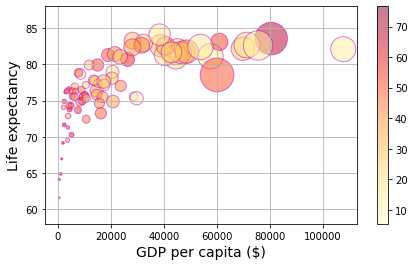

In [40]:
plt.figure(figsize=(7, 4))
plt.scatter(gdp, expectancy, s=total_exp/9, 
            c=private_health, edgecolor='m',
            cmap='YlOrRd', alpha=0.5)
plt.colorbar()
plt.xlabel('GDP per capita ($)', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.ylim([58, 88])
plt.grid()
plt.show()

Among the arguments used to specify the bubble plot:
- argument `s` is used to specify the bubble sizes;
- argument `c` is used to specify the bubble colors;
- argument `edgecolor` is used to specify the edge color of bubbles;
- argument `cmap` indicates the color map, transforms numerical values into the corresponding colors. Options of color maps are provided at the website [Choosing Colormaps in Matplotlib¶](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

### What to avoid <a id="subsection3.4"></a>

#### 3D visuals

> *One of the golden rules of data visualization goes like this: never use 3D.* - [Storytelling with Data](https://www.storytellingwithdata.com/)

Graphs with 3D effects are typically not straightforward in telling the corresponding values. Check the examples below.

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/3d_graphs.png?raw=true" width=700>


#### Secondary y-axis

The secondary y axis should be avoided because it takes some time for the audience to understand which data should be read against which axis. If you insist in using using a dual y-axis chart, make sure that you are linking the axis to the data through the use of color.

#### Tables in presentations

> *Using a table in a live presentation is rarely a good idea. As your audience reads it, you lose their ears and attention to make your point verbally.* - [Storytelling with Data](https://www.storytellingwithdata.com/)

#### Change color without good reasons

> *One question regularly raised in my workshops is around novelty. Does it make sense to change up the colors or graph types so the audience doesn’t get bored? My answer is a resounding No! The story you are telling should be what keeps your audience’s attention, not the design elements of your graphs.* <br>
> *...* <br>
> *A change in colors signals just that—a change. So leverage this when you want your audience to feel change for some reason, but never simply for the sake of novelty.* - [Storytelling with Data](https://www.storytellingwithdata.com/)


#### Unethical use of data visualization

> *But what if changing the scale on a bar chart or otherwise manipulating the data better reinforces the point
you want to make? Misleading in this manner by inaccurately visualizing data is not OK. Beyond ethical concerns, it is risky territory. All it takes is one discerning audience member to notice the issue and your entire argument will be thrown out the window, along with your credibility.* - [Storytelling with Data](https://www.storytellingwithdata.com/)

Check the examples below.

<figure>
<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/fox_news_tricky_dv.png?raw=true" width=400>
<center><figcaption><b>Bar chart in Fox News</b></figcaption></center>
</figure>
<br>

<figure>
<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/dopesick_logscale.jpeg?raw=true" width=400>
<center><figcaption><b>Manipulated chart - <a href="https://www.youtube.com/watch?v=y305az3PQLk&ab_channel=TheRevaknight">TV Series "Dopesick"</a></b></figcaption></center>
</figure>

### Interpretation of data visuals <a id="subsection3.5"></a>

<div class="alert alert-block alert-info">
<b>Question 3:</b> The bar chart below shows the fatality rates of Covid-19 in Italy and China in 2020, respectively. It is observed that the fatality rate for each age group in China is higher than Italy, but the overall fatality rate in Italy is higher than China. Can you give an explanation to the seemingly paradoxical data. 
</div>

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/covid_simpson_paradox_1.png?raw=true" width=350>

It can be seen that in Italy, more aged people are infected, so the overall fatality rate is higher. This phenomenon is referred to as the *Simpson's Paradox*, which shows a trend in several groups of data but the trend disappears or reverses when the groups are combined. 

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/covid_simpson_paradox_2.png?raw=true" width=350>

<div class="alert alert-block alert-info">
<b>Question 4:</b> The file "condo_2018.csv" provides a dataset of condominium transactions in the year of 2018. All properties involved in these transactions are located in district 28 and have a lease period of 99 years. The figures below show that 1) resale condos are more expensive than new sale condos; and 2) the commencing year is negatively correlated with the price, implying that newly built condos are cheaper than older ones. Can you use data visualization to explain these observations. 
</div>

<div style="float:left;width:58%;">
<br>
<center>
<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/condo_sale_confounder.png?raw=true">
</center>
</div>

<div style="float:right;width:40%">
<br>
Correlation between commencing years and prices:
<center>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>commence</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>commence</th>
      <td>1.000000</td>
      <td>-0.129123</td>
    </tr>
    <tr>
      <th>price</th>
      <td>-0.129123</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
</center>
</div>

In [41]:
condo = pd.read_csv('condos_2018.csv')
condo

,project,street,segment,commence,sale,price,area,level
0,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,1672280.0,1281,16 to 20
1,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,1622810.0,1453,01 to 05
2,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,915680.0,667,06 to 10
3,SELETAR PARK RESIDENCE,SELETAR ROAD,OCR,2011.0,Resale,1300000.0,1442,01 to 05
4,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,1234810.0,980,06 to 10
...,...,...,...,...,...,...,...,...
314,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,668000.0,506,16 to 20
315,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,771000.0,581,11 to 15
316,SUNRISE GARDENS,SUNRISE AVENUE,OCR,1995.0,Resale,1088000.0,1464,01 to 05
317,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,857000.0,667,06 to 10


**Solution:**